In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

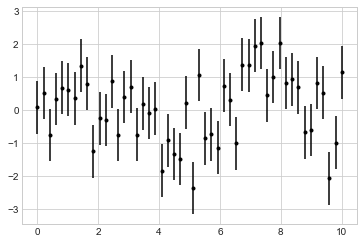

In [2]:
# Basic Errorbars
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

# yerr -> The errorbar sizes   
# fmt -> plot format string, optional, default: ‘’

plt.errorbar(x, y, yerr=dy, fmt='.k');   

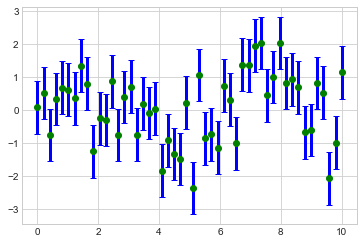

In [12]:
# More details
# ecolor -> A matplotlib color arg which gives the color the errorbar lines
# elinewidth -> The linewidth of the errorbar lines
# capsize -> The length of the error bar caps in points.
plt.errorbar(x, y, yerr=dy, fmt='o', color='green', ecolor='blue', elinewidth=3, capsize=3);

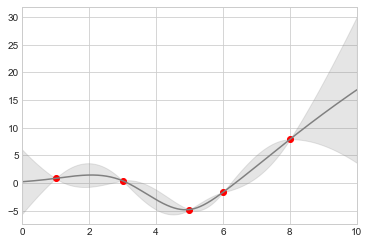

In [16]:
# Continuous Errors
from sklearn.gaussian_process import GaussianProcess

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcess(corr = 'cubic', theta0=1e-2, thetaL=1e-4, thetaU=1E-1, random_start=100)
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], eval_MSE=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')
# fill between Continuous Errors
plt.fill_between(xfit, yfit-dyfit, yfit+dyfit, color='gray', alpha=0.2)
plt.xlim(0, 10);